<a href="https://colab.research.google.com/github/yohan2001colombo/pyTorch/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [123]:
# Import the libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [124]:
# convert MNIST Image files into a Tensor of 4-Dimensions (# of Images, Height, Width, colour channel)

transform = transforms.ToTensor()

In [125]:
# Train Data
train_data = datasets.MNIST(root='cnn_data',train=True, download=True,transform = transform)

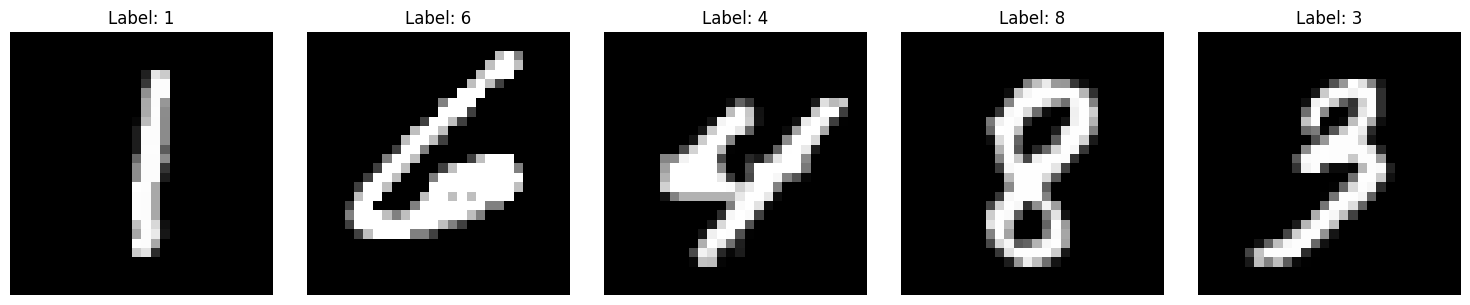

In [128]:
train_loader_pytorch = DataLoader(train_data, batch_size = 1, shuffle = True)
# Create a figure to display the images
plt.figure(figsize=(15, 3))

# Print the first few images in a row
for i, (image, label) in enumerate(train_loader_pytorch):
    if i < 5:  # Print the first 5 samples
        plt.subplot(1, 5, i + 1)
        plt.imshow(image[0].squeeze(), cmap='gray')
        plt.title(f"Label: {label.item()}")
        plt.axis('off')
    else:
        break  # Exit the loop after printing 5 samples

plt.tight_layout()
plt.show()

In [82]:
test_data = datasets.MNIST(root='cnn_data',train=False, download=True, transform = transform)

In [83]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: cnn_data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [84]:
pwd

'/content/cnn_data'

In [85]:
ls

cnn_data/  MNIST/


In [86]:
ls MNIST/

raw/


In [87]:
ls

cnn_data/  MNIST/


In [88]:
ls

cnn_data/  MNIST/


In [89]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: cnn_data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [90]:
# create a small batch size for images... lets say 10
train_loader = DataLoader(train_data, batch_size = 10, shuffle = True)
test_loader = DataLoader(test_data, batch_size = 10, shuffle=True)

In [91]:
# Define Our CNN model
# Describe convolutional layer and what it's doing (2 CNN layer)
# futher datails https://www.datacamp.com/tutorial/introduction-to-convolutional-neural-networks-cnns?utm_source=google&utm_medium=paid_search&utm_campaignid=19589720824&utm_adgroupid=157156376071&utm_device=c&utm_keyword=&utm_matchtype=&utm_network=g&utm_adpostion=&utm_creative=684592140425&utm_targetid=aud-1459190388940:dsa-2218886984380&utm_loc_interest_ms=&utm_loc_physical_ms=9199150&utm_content=ps-other~apac-en~dsa~tofu~tutorial-machine-learning&accountid=9624585688&utm_campaign=230119_1-ps-other~dsa~tofu_2-b2c_3-apac_4-prc_5-na_6-na_7-le_8-pdsh-go_9-nb-e_10-na_11-na&gad_source=1&gad_campaignid=19589720824&gclid=Cj0KCQjwjJrCBhCXARIsAI5x66Uf0XuTUPi3M_b9uvoF7ASr7Er9mzQftB0aH8uHcmlelHHG2czVAO8aAu6DEALw_wcB


conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=3, stride=1)
conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=3, stride=1)

In [92]:
# Grab 1 MNIST record/Image
for i, (X_train, y_train) in enumerate(train_data):
  break

In [93]:
X_train.shape
# torch.Size([1, 28, 28]) ==> 1 Image 28*28 pixels

torch.Size([1, 28, 28])

In [94]:
x = X_train.view(1,1,28,28)
# 1 Batch 1 Image 28*28 Image Pixel

In [95]:
# Perform our first convolution
x = F.relu(conv1(x)) # Recitified Linear Unit for our activation function


In [96]:
# 1 Single Image, 6  is the filters we asked for 26*26 pixels
x.shape

torch.Size([1, 6, 26, 26])

In [97]:
# pass through the pooling layer
x = F.max_pool2d(x,2,2) # kernel of 2 and stride of 2

In [98]:
x.shape
# 26/2 = 13

torch.Size([1, 6, 13, 13])

In [99]:
# Do our second convolution
x = F.relu(conv2(x))

In [100]:
# Again we didn't set padding so we lose 2 pixels around the outside of the image
x.shape

torch.Size([1, 16, 11, 11])

In [101]:
# Pooling Layer
x = F.max_pool2d(x,2,2)

In [102]:
# 11/2 = 5.5 but we have to round down because you can't invent data to round up # lose data in pooling
x.shape

torch.Size([1, 16, 5, 5])

In [103]:
# 1 Image ==> Conv1 ==> Padding ==> Conv2 ==> Padding
# Model Class
class convolutionalNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1,6,3,1)
    self.conv2 = nn.Conv2d(6,16,3,1)
    # Fully connected layer
    self.fc1 = nn.Linear(5*5*16,120)
    self.fc2 = nn.Linear(120,84)
    self.fc3 = nn.Linear(84,10)

  def forward(self,x):
    x = F.relu(self.conv1(x))
    x = F.max_pool2d(x,2,2) # 2x2 kernel and stride 2
    x = F.relu(self.conv2(x))
    x = F.max_pool2d(x,2,2)

    # Re-View to flatten it out
    x = x.view(-1,5*5*16) # negative one so that we can vary the batch size

    # Fully connected layer
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)

    return F.log_softmax(x,dim=1)


In [104]:
# Create an Instance of our model
torch.manual_seed(42)
model = convolutionalNetwork()
model

convolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [105]:
# Loss function Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # smaller the laerning rate longer its gonna take to train


In [106]:
model

convolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [108]:
import time
start_time = time.time()

# create variales to track things
epochs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []

# for Loop of Epochs
for i in range(epochs):
  trn_corr = 0
  tst_corr = 0

  # Train
  for b, (X_train, y_train) in enumerate(train_loader):
    b = b+1 # start our batchs at 1
    y_pred = model(X_train) # get predicted value from the training set, Not flattened
    loss = criterion(y_pred, y_train) # how off are we? cmpare the parameters to correct

    predicted = torch.max(y_pred.data,1)[1]
    batch_corr = (predicted == y_train).sum()
    trn_corr += batch_corr

    # update our parameters
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # print out some results
    if b%600 == 0:
      print(f'epoch: {i}  batch: {b}  loss: {loss.item()}  \
      accuracy: {trn_corr.item()*100/(10*b)}%')
    # Train
  train_losses.append(loss)
  train_correct.append(trn_corr)

    # Test
  with torch.no_grad():
    for b, (X_test, y_test) in enumerate(test_loader):
      y_val = model(X_test)
      predicted = torch.max(y_val.data,1)[1] # Adding up correct predictions
      tst_corr += (predicted == y_test).sum() # T=1 F=0 and sum away


  loss = criterion(y_val, y_test)
  test_losses.append(loss)
  test_correct.append(tst_corr)


current_time = time.time()
total = current_time - start_time
print(f'total time: {total/60} minutes')

epoch: 0  batch: 600  loss: 0.3004239499568939        accuracy: 87.25%
epoch: 0  batch: 1200  loss: 0.6581100225448608        accuracy: 90.25%
epoch: 0  batch: 1800  loss: 0.37946993112564087        accuracy: 91.74444444444444%
epoch: 0  batch: 2400  loss: 0.149811789393425        accuracy: 92.625%
epoch: 0  batch: 3000  loss: 0.005510914605110884        accuracy: 93.28%
epoch: 0  batch: 3600  loss: 0.2897501289844513        accuracy: 93.81111111111112%
epoch: 0  batch: 4200  loss: 0.13308404386043549        accuracy: 94.20714285714286%
epoch: 0  batch: 4800  loss: 0.016969826072454453        accuracy: 94.52708333333334%
epoch: 0  batch: 5400  loss: 0.16984859108924866        accuracy: 94.87037037037037%
epoch: 0  batch: 6000  loss: 0.020191635936498642        accuracy: 95.12666666666667%
epoch: 1  batch: 600  loss: 0.029463794082403183        accuracy: 97.73333333333333%
epoch: 1  batch: 1200  loss: 0.027131149545311928        accuracy: 97.55%
epoch: 1  batch: 1800  loss: 0.0003603386

In [110]:
test_correct

[tensor(9729), tensor(9828), tensor(9867), tensor(9844), tensor(9851)]

In [111]:
y_pred = model(X_train)

In [114]:
torch.max(y_pred.data,1)[1]

tensor([2, 2, 3, 6, 2, 6, 6, 1, 7, 3])

In [116]:
torch.max(y_pred.data,1)

torch.return_types.max(
values=tensor([-3.5166e-05, -1.9799e-04, -1.5945e-01, -2.9325e-05, -4.0857e-04,
        -4.0118e-04, -7.1526e-07, -3.1948e-05, -3.9841e-03,  0.0000e+00]),
indices=tensor([2, 2, 3, 6, 2, 6, 6, 1, 7, 3]))

In [117]:
y_train

tensor([2, 2, 3, 6, 2, 6, 6, 1, 7, 3])

In [118]:
batch_corr

tensor(10)